### Segundo Avance PIA 
#### Equipo 3
#### Grupo 012, martes y jueves de 18:30 a 20:00 hrs
#### Integrantes:
- **1729734      De la Garza Fernandez, Carla Mayela**
- **1625654      Zamarrón Medrano, Alan**

-------------------------------------------
### [Spotify Dataset 1921-2020, 160k+ Tracks](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks)
### Music4U: Sistema de Recomendación Personalizado Solo Para Ti


**Descripción de los Datos**

La [Spotify Dataset 1921-2020, 160k+ Tracks](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) es una base de datos que cuenta con más de 160,000 canciones que van desde el año 1921 al 2020 recopiladas de la API Web de Spotify. Los datos se encuentran en forma de tablas. Usaremos como tabla principal la tabla que contiene las canciones “data.csv”, pero también usaremos las tablas que están divididas por artista, año, género y artistas con género.

Ahora, veremos una descripción de los datos en cuanto a las columnas, tipos de datos, tamaño de la base de datos, etc.

In [70]:
#Importamos las librerias necesarias
import pandas as pd
import zipfile as zp

In [71]:
#Extraemos las tablas del archivo .zip, las leemos y las guardamos en las variables siguientes
archive = zp.ZipFile("archive.zip", "r")
df = pd.read_csv(archive.open("data.csv"))
df_artist = pd.read_csv(archive.open("data_by_artist.csv"))
df_genre = pd.read_csv(archive.open("data_by_genres.csv"))
df_year = pd.read_csv(archive.open("data_by_year.csv"))
df_w_genre = pd.read_csv(archive.open("data_w_genres.csv"))

A continuación vemos la cantidad de filas o registros y el número de columnas que hay en cada tabla.

In [72]:
print("Tabla canciones: ", df.shape)
print("Tabla clasificada por artistas: ", df_artist.shape)
print("Tabla clasificada por generos: ", df_genre.shape)
print("Tabla clasificada por años: ", df_year.shape)
print("Tabla clasificada por artistas con generos: ", df_w_genre.shape)

Tabla canciones:  (169909, 19)
Tabla clasificada por artistas:  (27621, 15)
Tabla clasificada por generos:  (2664, 14)
Tabla clasificada por años:  (100, 14)
Tabla clasificada por artistas con generos:  (27621, 16)


Ahora veremos qué tipo de datos contienen nuestras tablas. Podemos observar a continuación que las tablas en general contienen en su mayoría datos númericos (datos flotantes y enteros), a excepción de algunas columnas que contienen strings.

**Tabla canciones**

In [73]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

**Tabla clasificada por artistas**

In [74]:
df_artist.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object

**Tabla clasificada por géneros**

In [75]:
df_genre.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

**Tabla clasificada por años**

In [76]:
df_year.dtypes

year                  int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

**Tabla clasificada por artistas con géneros**

In [77]:
df_w_genre.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

------
**Justificación del Uso de Datos**

Decidimos utilizar esta base de datos porque los datos son muy completos y porque pudimos plantearnos varios objetivos al momento de decidir qué objetivo final utilizar. Otro aspecto muy importante para nosotros es que en la página de Kaggle muestran que esta base de datos tiene una calificación de 10.0 de usabilidad. Además de que cuenta con suficientes datos para nuestro proyecto.

También, resulta muy interesante que podamos aplicar la ciencia, las matemáticas y el aprendizaje de máquina para analizar música, un aspecto común y casi indispensable en nuestro día a día.

A diferencia de otras bases de datos también encontradas en Kaggle, esta particularmente cuenta con columnas que son muy útiles, tales como año de lanzamiento, artista, nombre, popularidad, género.

-----
**Objetivo Principal**

Realizar un sistema de recomendación que sea personalizado para los usuarios de tal forma que mejore la experiencia de usuario.

**Objetivos Secundarios**

- Predecir qué artistas y qué géneros de música lanzarán la música más popular en el año siguiente, en base a los datos con lo que ya contamos.
- Analizar cuáles han sido los géneros más populares y explicar el por qué, analizando tambien los aspectos relacionados a estos, como la bailabilidad.

---
### Desarrollo de las Herramientas

**Limpieza de Datos**

A continuación mostramos los datos de cada tabla sin manipulación.

**Tabla canciones**


In [78]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


**Tabla clasificada por artistas**

In [79]:
df_artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


**Tabla clasificada por géneros**

In [80]:
df_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


**Tabla clasificada por años**

In [81]:
df_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


**Tabla clasificada por artistas con géneros**

In [82]:
df_w_genre.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


**Eliminación de columnas y datos nulos**

Ahora procederemos a eliminar las columnas no deseadas y mostraremos cómo quedan las nuevas tablas sin las columnas no deseadas. En este punto también eliminaremos los datos nulos que no nos sirven.

[Cómo eliminar varias columnas de una tabla a la vez](https://cmdlinetips.com/2020/05/drop-multiple-columns-in-pandas-dataframe/)

[Cómo crear una nueva tabla sin los valores nulos](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/)

**Tabla canciones**

In [98]:
#Vamos a eliminar las columnas que vemos dentro de la lista siguiente 
#y la nueva tabla sin estas columnas la guardamos en una variable nueva
#Se decide eliminar estas columnas ya que no tienen importancia para alcanzar nuestros objetivos
#solo nos interesa la columna artistas, bailabilidad, duración en ms, contenido explicito, id,
#nombre, popularidad, año de lanzamiento y año
new_df = df.drop(['acousticness', 'instrumentalness', 'key', 'liveness', 
                  'loudness', 'speechiness', 'tempo', 'valence', 'energy', 'mode'], axis=1)
new_df

,artists,danceability,duration_ms,explicit,id,name,popularity,release_date,year
0,['Carl Woitschach'],0.708,158648,0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,0,1928,1928
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,1928
2,['Seweryn Goszczyński'],0.749,104300,0,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,0,1928,1928
3,['Francisco Canaro'],0.781,180760,0,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,1928
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,1928
...,...,...,...,...,...,...,...,...,...
169904,"['DripReport', 'Tyga']",0.875,163800,1,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,75,2020-05-15,2020
169905,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),64,2020-06-08,2020
169906,"['Kygo', 'Oh Wonder']",0.514,180700,0,52eycxprLhK3lPcRLbQiVk,How Would I Know,70,2020-05-29,2020
169907,"['Cash Cash', 'Andy Grammer']",0.646,167308,0,3wYOGJYD31sLRmBgCvWxa4,I Found You,70,2020-02-28,2020


**Tabla clasificada por artistas**

In [84]:
#Hacemos exactamente lo mismo que el código anterior pero para esta tabla y 
#lo mismo para las tablas restantes
#Se decide eliminar estas columnas ya que no tienen importancia para alcanzar nuestros objetivos
#solo nos interesa la columna artistas, bailabilidad, duración en ms, popularidad y el conteo
#de cuantas veces está presente ese artista en la tabla
new_df_artist = df_artist.drop(['acousticness', 'instrumentalness', 'liveness', 
                                'loudness', 'speechiness', 'tempo', 'valence', 'energy', 
                                'mode', 'key'], axis=1)
new_df_artist

,artists,danceability,duration_ms,popularity,count
0,"""Cats"" 1981 Original London Cast",0.442750,247260.000000,38.000000,12
1,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,33.076923,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,34.285714,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,34.444444,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.437333,232428.111111,42.555556,9
...,...,...,...,...,...
27616,鳳飛飛,0.358000,259387.000000,35.000000,2
27617,黃品源,0.578000,293840.000000,47.000000,2
27618,黃國隆,0.570818,174582.727273,20.000000,11
27619,黃蜀娟,0.322262,212989.857143,23.000000,42


**Tabla clasificada por género**

Aquí además de eliminar columnas eliminaremos los valores nulos.

Eliminamos las filas que tienen valores nulo en la columna **genres**. Si tenemos un género nulo, no nos sirve ya que no podemos trabajar con el, analizarlo o sacar conclusiones.  

In [85]:
#Creamos una nueva tabla que contenga solamente géneros no nulos 
#y la guardamos en la variable no_null_genre
no_null_genre = df_genre[df_genre.genres != "[]"]
no_null_genre
#Ahora que tenemos esta nueva tabla sin valores nulos, procedemos a 
#eliminar las columnas no deseadas y guardamos esta nueva tabla en new_df_genre
#Se decide eliminar estas columnas ya que no tienen importancia para alcanzar nuestros objetivos
#solo nos interesa la columna géneros, bailabilidad, duración en ms y popularidad
new_df_genre = no_null_genre.drop(['acousticness', 'instrumentalness', 'liveness', 
                              'loudness', 'speechiness', 'tempo', 'valence', 'energy', 
                              'mode', 'key'], axis=1)
new_df_genre

,genres,danceability,duration_ms,popularity
0,432hz,0.299333,1.048887e+06,52.166667
2,a cappella,0.577017,1.936522e+05,43.351819
3,abstract,0.459500,3.430185e+05,41.500000
4,abstract beats,0.694400,2.338244e+05,58.600000
5,abstract hip hop,0.723132,2.490951e+05,43.804971
...,...,...,...,...
2659,zolo,0.560365,2.675453e+05,33.760410
2660,zouglou,0.834000,2.951470e+05,56.000000
2661,zouk,0.752762,2.951100e+05,42.476190
2662,zouk riddim,0.776000,2.293330e+05,24.000000


**Tabla clasificada por años**

In [86]:
#Se decide eliminar estas columnas ya que no tienen importancia para alcanzar nuestros objetivos,
#solo nos interesa la columna año, bailabilidad, duracion en ms y popularidad.
new_df_year = df_year.drop(['acousticness', 'instrumentalness', 'liveness', 
                            'loudness', 'speechiness', 'tempo', 'valence', 'energy', 
                            'mode', 'key'], axis=1)
new_df_year

,year,danceability,duration_ms,popularity
0,1921,0.425661,229911.914062,0.351562
1,1922,0.480000,167904.541667,0.138889
2,1923,0.568462,178356.301775,5.727811
3,1924,0.548654,188461.649789,0.603376
4,1925,0.571890,184130.699620,2.707224
...,...,...,...,...
95,2016,0.599976,219400.763840,61.371254
96,2017,0.612286,209343.613000,64.861500
97,2018,0.664930,200919.119000,67.276000
98,2019,0.644215,197733.133000,69.655500


**Tabla clasificada por artistas con géneros**

Aquí además de eliminar columnas eliminaremos los valores nulos.

Eliminamos las filas que tienen valores nulo en la columna **genres**. Si tenemos un género nulo, no nos sirve ya que no podemos trabajar con el, analizarlo o sacar conclusiones. El mismo caso que en la tabla clasificada por géneros.

In [87]:
#Creamos una nueva tabla que contenga solamente artistas con géneros no nulos 
#y la guardamos en la variable no_null_genre_a
no_null_genre_a = df_w_genre[df_w_genre.genres != "[]"]
no_null_genre_a
#Ahora que tenemos esta nueva tabla sin valores nulos, procedemos a 
#eliminar las columnas no deseadas y guardamos esta nueva tabla en new_df_genre
#Se decide eliminar estas columnas ya que no tienen importancia para alcanzar nuestros objetivos
#solo nos interesa la columna artistas, bailabilidad, duración en ms, popularidad, conteo
#de cuantas veces está presente ese artista en la tabla y géneros
new_df_w_genre = no_null_genre_a.drop(['acousticness', 'instrumentalness', 'liveness', 
                               'loudness', 'speechiness', 'tempo', 'valence', 'energy', 
                                  'mode', 'key'], axis=1)
new_df_w_genre

,artists,danceability,duration_ms,popularity,count,genres
0,"""Cats"" 1981 Original London Cast",0.442750,247260.000000,38.000000,12,['show tunes']
9,"""Weird Al"" Yankovic",0.664788,218165.257576,33.681818,132,"['antiviral pop', 'comedy rock', 'comic', 'par..."
11,$NOT,0.750125,152929.500000,64.625000,8,"['east coast hip hop', 'gangster rap', 'hardco..."
13,$uicideBoy$,0.765246,147549.442623,61.647541,122,"['dark trap', 'new orleans rap', 'underground ..."
15,'In The Heights' Original Broadway Company,0.541000,301908.294118,46.588235,17,"['broadway', 'show tunes']"
...,...,...,...,...,...,...
27611,陳秀男,0.553500,263286.500000,44.000000,2,['taiwan campus folk']
27612,陳蘭麗,0.609000,152883.000000,34.000000,2,['taiwan campus folk']
27616,鳳飛飛,0.358000,259387.000000,35.000000,2,"['c-pop', 'classic mandopop', 'vintage chinese..."
27617,黃品源,0.578000,293840.000000,47.000000,2,"['c-pop', 'classic cantopop', 'classic mandopop']"


Ahora, vamos a guardar estas nuevas tablas con las columnas y filas que solamente necesitamos como otros archivos para poder utilizarlas más tarde.

In [101]:
new_df.to_csv('new_df.csv', index=False)
new_df_artist.to_csv('new_data_by_artist.csv', index=False)
new_df_year.to_csv('new_data_by_year.csv', index=False)
new_df_genre.to_csv('new_data_by_genres.csv', index=False)
new_df_w_genre.to_csv('new_data_w_genres.csv', index=False)

---------

### Estadística Básica de los Datos


Importamos las nuevas tablas que acabamos de guardar.

In [89]:
new_df = pd.read_csv("new_data.csv")
new_df_art = pd.read_csv("new_data_by_artist.csv")
new_df_gen = pd.read_csv("new_data_by_genres.csv")
new_df_year = pd.read_csv("new_data_by_year.csv")
new_df_w_gen = pd.read_csv("new_data_w_genres.csv")

**Datos estadísticos básicos**

- Vamos a sacar el **promedio** de los elementos de la columna bailabilidad de la tabla canciones.

La bailabilidad en la tabla canciones 'data.csv' nos dice que de todas las canciones mas de la mitad son bailables.

In [103]:
new_df['danceability'].mean()

0.5381497172015446

- Ahora vamos a sacar el **promedio** de los elementos de la columna duracion en milisegundos en la tabla canciones

La duracion promedio de una cancion es de 231406.16 milisegundos (3.8 minutos)

In [104]:
new_df['duration_ms'].mean()

231406.1589733328

- Vamos a sacar la **desviación estándar** de la columna de bailabilidad de la tabla canciones

Este resultado nos dice que de tiene un rango minimo de dispersion ya que los datos son algo parecidos entre si.

In [105]:
new_df['danceability'].std()

0.1753457820476098

- Ahora utilizaremos la funcion count() para **contar** cuántos años hay en la tabla clasificada por años.

Esto nos dice que hay **100 años** en nuestra tabla (1921-2020), esto es un dato que ya sabiamos solo había que confirmarlo.

In [106]:
new_df_year.count()

year            100
danceability    100
duration_ms     100
popularity      100
dtype: int64

- También usaremos count() para **contar** cuántas canciones hay en la tabla de canciones.

Hay un total de **169,909 canciones** en la tabla

In [107]:
new_df.count()

artists         169909
danceability    169909
duration_ms     169909
explicit        169909
id              169909
name            169909
popularity      169909
release_date    169909
year            169909
dtype: int64

- A continuación, podemos ver que hay **2,663 géneros** en la tabla clasificada por géneros

In [109]:
new_df_gen['genres'].count()

2663

- También podemos ver que hay **27,621 artistas** en la tabla clasificada por artistas.

In [110]:
new_df_art['artists'].count()

27621

- Observamos que el valor minimo de popularidad para una cancion es de **0**

In [112]:
new_df['popularity'].min()

0

- Mientras que el valor máximo de popularidad para una canción es de **100**

In [113]:
new_df['popularity'].max()

100

- Valor minimo de una canción en milisegundos es de 5,108 milisegundos, **0.005 segundos**

In [116]:
new_df['duration_ms'].min()

5108

- Valor maximo de una canción en milisegundos es de 540,3500 milisegundos, **90 minutos**

In [118]:
new_df['duration_ms'].max()

5403500

- En promedio, una canción tiene el valor de popularidad de **31.55/100**

In [119]:
new_df['popularity'].mean()

31.55660971461194

Toda esta información de estadística básica nos es útil para saber con cúantas canciones, géneros, artistas y años vamos a estar trabajando. También, nos será útil saber la popularidad promedio ya que nuestro objetivo es realizar un sistema de recomendación y para ello nos basaremos en varias columnas, entre ellos la popularidad.

-----

### Gráficas

---------

In [125]:
#Importamos las liberias necesarias para las graficas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

- Esta primera grafica nos muestra los 15 artistas que tienen más presencia/canciones en la tabla de canciones. Por ejemplo, **The Beatles** se repite alrededor de 400 veces y tambien podemos concluir que el artista **Эрнест Хемингуэй** es el que tiene mas canciones en nuestra tabla de canciones.

Text(0, 0.5, 'Numero de canciones')

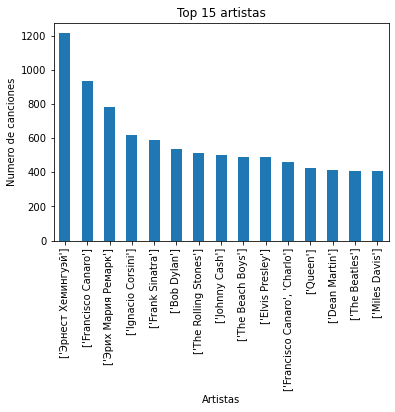

In [126]:
new_df['artists'].value_counts().head(15).plot.bar()
plt.title('Top 15 artistas')
plt.xlabel('Artistas')
plt.ylabel('Numero de canciones')

- Ahora queremos ver la proporción en el eje de las y. La siguiente gráfica nos indica que poco más de **7%** de las canciones que hay en total en el dataset son del artista Эрнест Хемингуэй

Text(0, 0.5, 'Numero de canciones')

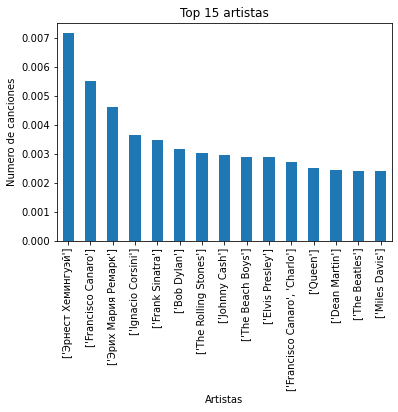

In [128]:
(new_df['artists'].value_counts().head(15)/len(df)).plot.bar()
plt.title('Top 15 artistas')
plt.xlabel('Artistas')
plt.ylabel('Numero de canciones')

- En esta siguiente grafica podemos observar que en el año 1920 las canciones que se hacian eran menos de 250 y luego vemos que en el año aproximadamente 1940 subió mucho el número de canciones para luego bajar drasticamenete en los siguientes años.

A partir del año 1960 podemos ver que el número de canciones que se hicieron se mantuvo muy estable, ya no bajo ni subió, hasta el 2020 que el número bajó, ¿por qué creemos que esta cantidad decrementó? Creemos que es porque aun estamos en el 2020 y la base de datos no ha sido actualizada con todas las canciones que han salido este año, tendríamos que esperarnos a que termine el año y actualizar la base de datos con las canciones de este año para poder realizar una mejor comparación.

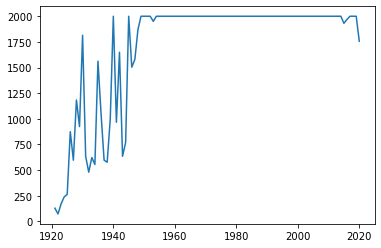

In [130]:
new_df['year'].value_counts().sort_index().plot.line()

- En esta siguiente grafica podemos apreciar que un gran porcentaje de las canciones tienen una popularidad de **0**, mientras que las canciones que tienen popularidad de mas de **80** son relativamente pocas, comparandolo con la cantidad total de canciones que tenemos en el dataset. Otra conclusion que podemos hacer es que la mayoria de las canciones en el dataset tiene una popularidad entre **30 y 60**.

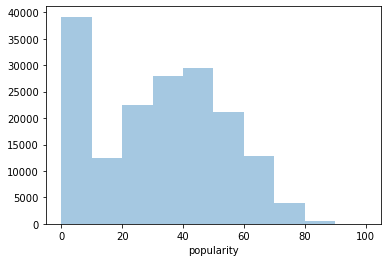

In [131]:
sns.distplot(new_df['popularity'], bins=10, kde=False)

- Ya que estamos en el ambito de popularidad, ahora nos interesa saber exactamente cuales son las cancines más populares.

En la siguiente tabla podemos apreciar las 15 canciones mas populares. Podemos apreciar que la cancion **"death bed"** tiene una popularidad de casi **100**.

[Link que nos ayudó a descubrir y utilizar esta tabla](https://www.kaggle.com/tanujdhiman/spotify-data-visualiation)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

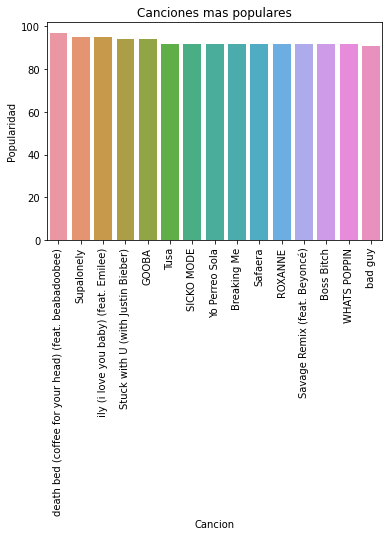

In [133]:
x = new_df.groupby('name')['popularity'].mean().sort_values(ascending=False).head(15)
ax = sns.barplot(x.index, x)
ax.set_title('Canciones mas populares')
ax.set_xlabel('Cancion')
ax.set_ylabel('Popularidad')
plt.xticks(rotation=90)

- En la siguiente tabla podemos observar los artistas mas populares segun el su grado de popularidad. Podemos concluir que la artista **Emilee** es la mas popular con un valor de poco mas de **80** de popularidad**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

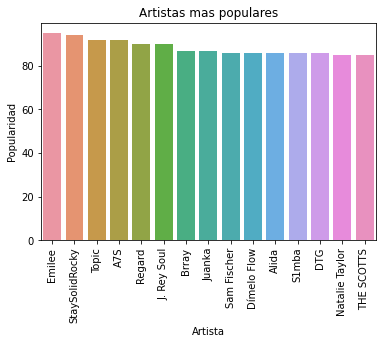

In [145]:
x = new_df_art.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(15)
ax = sns.barplot(x.index, x)
ax.set_title('Artistas mas populares')
ax.set_xlabel('Artista')
ax.set_ylabel('Popularidad')
plt.xticks(rotation=90)

- Ya que sabemos cuales son las canciones mas populares, ahora nos interesa saber cuales géneros son los más populares. Esto lo obtenemos segun la columna de popularidad de la tabla clasificada por generos. Podemos ver que el género **guaracha** es el más popular.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

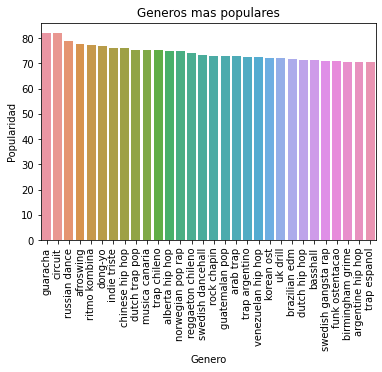

In [144]:
x = new_df_gen.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(30)
ax = sns.barplot(x.index, x)
ax.set_title('Generos mas populares')
ax.set_xlabel('Genero')
ax.set_ylabel('Popularidad')
plt.xticks(rotation=90)

- Ahora nos interesa saber cuáles años han sido los más populares, es decir, qué años son los que tienen más cantidad de canciones populares. En la siguiente gráfica podemos ver los 15 años más populares y podemos concluir que el año **2019** ha sido el año mas popular en la historia de nuestra base de datos.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

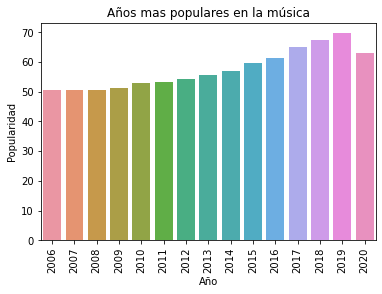

In [143]:
x = new_df_year.groupby('year')['popularity'].mean().sort_values(ascending=False).head(15)
ax = sns.barplot(x.index, x)
ax.set_title('Años mas populares en la música')
ax.set_xlabel('Año')
ax.set_ylabel('Popularidad')
plt.xticks(rotation=90)

- En la siguiente gráfica Hexplot, podemos observar que la popularidad de las canciones en general ha ido **aumentando** con el paso de los años.

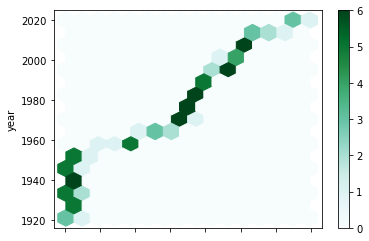

In [149]:
new_df_year[new_df_year['popularity'] < 100].plot.hexbin(x='popularity', y='year', gridsize=15)

- En la siguiente grafica multivariante podemos observar que conforme han pasado los años el número de canciones con contenido **explicito** han **aumentado** mucho.

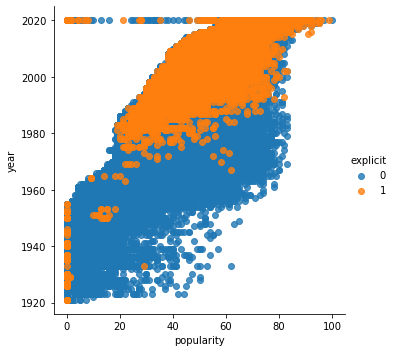

In [137]:
sns.lmplot(x='popularity', y='year', hue='explicit', 
           data=new_df.loc[new_df['explicit'].isin([0, 1])], 
           fit_reg=False)

- Sin embargo, si hacemos un histograma, nos podemos dar cuenta de que a pesar que las canciones con contenido explicito han aumentado mucho con el paso de los años, en general **predominan** las canciones con contenido no explicito. Podemos apreciar los resultados en el siguiente histograma.

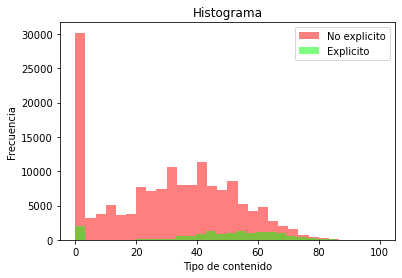

In [138]:
m = plt.hist(new_df[new_df["explicit"] == 0].popularity,bins=30,fc = (1,0,0,0.5),label = "No explicito")
b = plt.hist(new_df[new_df["explicit"] == 1].popularity,bins=30,fc = (0,1,0,0.5),label = "Explicito")
plt.legend()
plt.xlabel("Tipo de contenido")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

- Como se puede observar en la grafica lineal la mayoria de las canciones tiene mas de la mitad de bailabilidad.

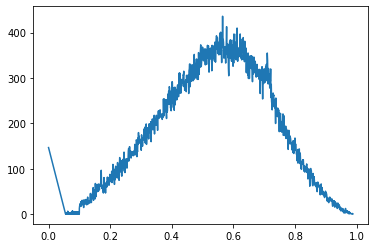

In [140]:
new_df['danceability'].value_counts().sort_index().plot.line()

- Aqui se puede observar los intervalos, y cuantas canciones de nuestra base de datos tienen una bailabilidad menor de **40%**

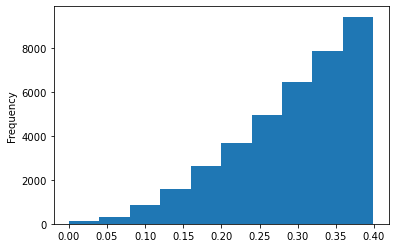

In [141]:
df[df['danceability']<.4]['danceability'].plot.hist()

- Lo que se puede observar en la grafica siguiente, es que la bailabilidad total de cada año, se observa que a inicios de años **1921-1936** las canciones tenian un alto valor de bailabilidad, despues se vio un considerable decremento en los **40's**, y posteriormente fue **incrementando**.

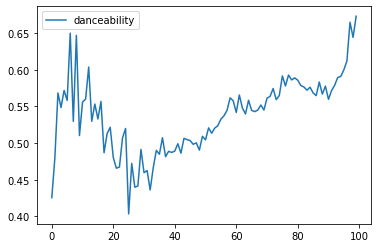

In [142]:
baianio = df_year[["danceability"]]
baianio.plot.line()

-----

### Conclusión Global


Aún no podemos contestar nuestros objetivos ya que aún no hemos desarrollado la herramienta que será un sistema de recomendación. Sin embargo, ya podemos ir concluyendo cuáles son los géneros, artistas, canciones y años más populares. Esto nos sirve ya que podríamos inferir qué géneros, artistas o canciones le interesan a nuestros usuarios.

También, podemos inferir que los géneros más populares el siguiente año serán guaracha o trap en español o que las canciones más populares muy probablemente tengan un contenido explícito, también podríamos inferir que probablemente la artista Emilee estará dentro de los artistas populares del siguiente año. Esto es información útil para nuestro objetivo secundario.

-----